<a href="https://colab.research.google.com/github/SIDD082/NHANES_Inferential_2023/blob/main/Copy_of_nhanes_inferentail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving BPXO_L.csv to BPXO_L.csv
Saving WHQ_L.csv to WHQ_L.csv
Saving VID_L.csv to VID_L.csv
Saving PAQ_L.csv to PAQ_L.csv
Saving KIQ_U_L.csv to KIQ_U_L.csv
Saving HEPB_S_L.csv to HEPB_S_L.csv
Saving DPQ_L.csv to DPQ_L.csv
Saving DEMO_L.csv to DEMO_L.csv


In [4]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.4/666.4 kB 10.6 MB/s eta 0:00:00


In [5]:
import pyreadstat
df, meta = pyreadstat.read_sav("C:/Users/siddi/Downloads/DEMO_L.xpt")

PyreadstatError: File C:/Users/siddi/Downloads/DEMO_L.xpt does not exist!

In [6]:
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [7]:
!pip install pyreadstat
!pip install pandas
!pip install requests
!pip install seaborn
!pip install scipy
!pip install matplotlib


In [9]:
# trying to Run R to convert xpt to csv files

install.packages("haven")

NameError: name 'install' is not defined

In [10]:
# Load the rpy2 extension
%load_ext rpy2.ipython

Now you can use the `%%R` magic command to run R code in a cell.

In [12]:
%%R
install.packages("haven")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/haven_2.5.5.tar.gz'
Content type 'application/x-gzip' length 316909 bytes (309 KB)
downloaded 309 KB


The downloaded source packages are in
	‘/tmp/RtmpL5XcHD/downloaded_packages’


In [13]:
import os

In [18]:
display(dataframes['DEMO_L'].info())

NameError: name 'dataframes' is not defined

In [19]:
%%R -i uploaded

# List all files in the current directory
files <- list.files("/content/", pattern = "\\.xpt$", full.names = TRUE)

# Loop through each .xpt file and convert it to .csv
for (file in files) {
  # Read the .xpt file using haven
  data <- haven::read_xpt(file)

  # Construct the output filename (change extension to .csv)
  output_file <- sub("\\.xpt$", ".csv", file)

  # Write the data to a .csv file
  write.csv(data, output_file, row.names = FALSE)

  cat(paste("Converted", file, "to", output_file, "\n"))
}

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'dict'>'

In [20]:
import os

# List all files in the /content/ directory
files_in_content = os.listdir("C:/Users/siddi/Downloads/DEMO_L.xpt")

# Filter for files ending with .csv
csv_files = [f for f in files_in_content if f.endswith('.csv')]

if csv_files:
    print("CSV files found in C:/Users/siddi/Downloads/DEMO_L.xpt:")
    for csv_file in csv_files:
        print(csv_file)
else:
    print("No CSV files found in /content/.")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/siddi/Downloads/DEMO_L.xpt'

In [ ]:
display(dataframes)

In [ ]:
display(dataframes['DEMO_L'].head())

In [ ]:
import pandas as pd
import os

# List all CSV files in the /content/ directory
csv_files = [f for f in os.listdir('/content/') if f.endswith('.csv')]

# Create a dictionary to store the DataFrames
dataframes = {}

# Loop through each CSV file and load it into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join('/content/', csv_file)
    df_name = os.path.splitext(csv_file)[0] # Get filename without extension
    dataframes[df_name] = pd.read_csv(file_path)
    print(f"Loaded {csv_file} into DataFrame '{df_name}'")

# You can now access the DataFrames using the dictionary, e.g., dataframes['DEMO_L'].head()

In [ ]:
%%R
library(haven) # Load the haven library

folder <- "/content/"
xpt_files <- list.files(folder, pattern = "\\.xpt$", full.names = TRUE)

# Loop through and convert each to .csv
for (xpt_file in xpt_files) {
  # Read .xpt file
  data <- read_xpt(xpt_file)

  # Create .csv filename
  csv_file <- sub("\\.xpt$", ".csv", xpt_file)

  # Write to CSV
  write.csv(data, csv_file, row.names = FALSE)

  cat("✅ Converted:", xpt_file, "→", csv_file, "\n")
}

In [ ]:
# changing back to python

demo = pd.read_csv("/content/DEMO_L.csv")
bp = pd.read_csv("/content/BPXO_L.csv")
vitd = pd.read_csv("/content/VID_L.csv")
hepb = pd.read_csv("/content/HEPB_S_L.csv")
kidney = pd.read_csv("/content/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/PAQ_L.csv")
weight = pd.read_csv("/content/WHQ_L.csv")
mental = pd.read_csv("/content/DPQ_L.csv")

In [ ]:
# Question 1

 #clean datasets
# Drop rows with missing marital status or education level
demo = demo.dropna(subset=['DMDMARTZ', 'DMDEDUC2'])

# Convert columns to string type
demo['DMDMARTZ'] = demo['DMDMARTZ'].astype(str)
demo['DMDEDUC2'] = demo['DMDEDUC2'].astype(str)

# Standardize text (strip whitespace, lowercase)
demo['DMDMARTZ'] = demo['DMDMARTZ'].str.strip().str.lower()
demo['DMDEDUC2'] = demo['DMDEDUC2'].str.strip().str.lower()

# Optional: Replace inconsistent labels
demo['DMDMARTZ'] = demo['DMDMARTZ'].replace({
    'single': 'unmarried',
    'never married': 'unmarried',
    'married': 'married',
    'divorced': 'divorced',
    'widowed': 'widowed'
})

demo['DMDEDUC2'] = demo['DMDEDUC2'].replace({
    'high school': 'high school',
    'hs': 'high school',
    'bachelor': 'bachelor',
    'ba': 'bachelor',
    'master': 'master',
    'phd': 'phd'
})

# Task
Analyze the association between marital status and education level using the `demo` DataFrame.

## Create a contingency table

### Subtask:
Create a cross-tabulation (contingency table) of the `DMDMARTZ` and `DMDEDUC2` columns from the `demo` DataFrame.


**Reasoning**:
Create a contingency table of marital status and education level using the cleaned demo DataFrame and display it.



In [ ]:
contingency_table = pd.crosstab(demo['DMDMARTZ'], demo['DMDEDUC2'])
display(contingency_table)

## Perform chi-squared test

### Subtask:
Conduct a chi-squared test of independence on the contingency table to determine if there is a statistically significant association between the two variables.


**Reasoning**:
Perform the chi-squared test on the contingency table.



In [15]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

NameError: name 'contingency_table' is not defined

## Interpret the results

### Subtask:
Based on the p-value from the chi-squared test, conclude whether there is a significant association between marital status and education level.


**Reasoning**:
Based on the instructions, I need to compare the obtained p-value with the significance level (0.05) and state the conclusion.



In [16]:
alpha = 0.05

if p < alpha:
    conclusion = "The p-value is less than the significance level (0.05), so we reject the null hypothesis."
    association_statement = "Conclusion: There is a statistically significant association between marital status and education level."
else:
    conclusion = "The p-value is greater than or equal to the significance level (0.05), so we fail to reject the null hypothesis."
    association_statement = "Conclusion: There is no statistically significant association between marital status and education level."

print(conclusion)
print(association_statement)

NameError: name 'p' is not defined

## Visualize the association (optional)

### Subtask:
Create a stacked bar chart or a heatmap to visually represent the relationship between marital status and education level.


**Reasoning**:
Create a stacked bar chart to visualize the relationship between marital status and education level using the contingency table and then add labels and title to the plot.



In [17]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Marital Status by Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

NameError: name 'contingency_table' is not defined

## Summary:

### Data Analysis Key Findings

*   The chi-squared test of independence revealed a statistically significant association between marital status and education level, with a Chi-squared statistic of approximately 199.96 and a p-value of approximately 1.15e-31.
*   The p-value (1.15e-31) is less than the significance level of 0.05, leading to the rejection of the null hypothesis of no association.
*   The stacked bar chart visually represents the distribution of education levels within each marital status category, illustrating the observed association.

### Insights or Next Steps

*   Further analysis could explore the nature of the association by examining standardized residuals from the chi-squared test or calculating measures of association like Cramer's V.
*   Investigating specific combinations of marital status and education level that contribute most to the observed association could provide deeper insights.


In [21]:

## Corrected analysis for Question 1: cleaned dataset and recoded DMDMARTZ

demo = pd.read_csv("/content/DEMO_L.csv")
bp = pd.read_csv("/content/BPXO_L.csv")
vitd = pd.read_csv("/content/VID_L.csv")
hepb = pd.read_csv("/content/HEPB_S_L.csv")
kidney = pd.read_csv("/content/KIQ_U_L.csv")
minbehavior = pd.read_csv("/content/PAQ_L.csv")
weight = pd.read_csv("/content/WHQ_L.csv")
mental = pd.read_csv("/content/DPQ_L.csv")

Contingency Table:
 DMDEDUC2                    Bachelors and above  Below bachelors
DMDMARTZ                                                        
Married                                    1631             2503
Never married/single                        517             1106
Widowed/Divorced/Separated                  473             1542

Chi-square Statistic: 157.97
Degrees of Freedom: 2
P-value: 0.0000

 Statistically significant association between marital status and education level.


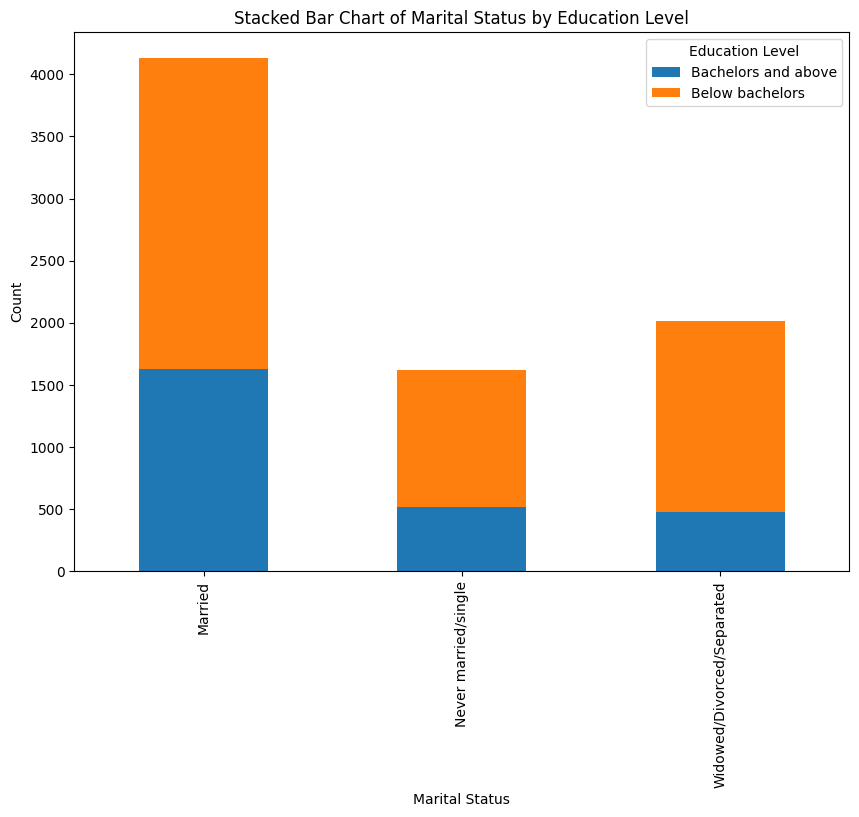

In [22]:
#q1: Is there a significant association between marital status and education?
maritaledu = demo[['DMDMARTZ', 'DMDEDUC2']].dropna()
maritaledu = maritaledu[
    (~maritaledu['DMDMARTZ'].isin([77, 99])) &
    (~maritaledu['DMDEDUC2'].isin([7, 9]))
]

marital_map = {
    1: 'Married',
    2: 'Widowed/Divorced/Separated',
    3: 'Never married/single',
}

maritaledu['DMDMARTZ'] = maritaledu['DMDMARTZ'].map(marital_map)

education_map = {k: 'Below bachelors' for k in range(1, 5)}
education_map[5] = 'Bachelors and above'

maritaledu['DMDEDUC2'] = maritaledu['DMDEDUC2'].map(education_map)

contingency_table = pd.crosstab(maritaledu['DMDMARTZ'], maritaledu['DMDEDUC2'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("\n Statistically significant association between marital status and education level.")
else:
    print("\n No statistically significant association found.")


contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Marital Status by Education Level')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

In [23]:
# Question 2: Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?
# Using the T-test method

import pandas as pd
from scipy.stats import ttest_ind


# Merge the two dataframes on 'SEQN'
merged_df = pd.merge(minbehavior, demo[['SEQN', 'DMDMARTZ']], on='SEQN', how='inner')

# Remove values 7777 and 9999 from PAD680 before dropping NaNs
merged_df = merged_df[~merged_df['PAD680'].isin([7777, 9999])]


# Drop rows with missing values in relevant columns
merged_df = merged_df.dropna(subset=['PAD680', 'DMDMARTZ'])


# Define marital status groups
# Based on the previous analysis, 1 is Married, 2 is Widowed/Divorced/Separated, 3 is Never married/single
married_group = merged_df[merged_df['DMDMARTZ'] == 1.0]['PAD680']
not_married_group = merged_df[merged_df['DMDMARTZ'].isin([2.0, 3.0])]['PAD680']

# Perform independent samples t-test
# Check if both groups have enough samples (at least 2) for t-test
if len(married_group) > 1 and len(not_married_group) > 1:
    t_stat, p_val = ttest_ind(married_group, not_married_group, equal_var=False)  # Assuming unequal variances with Welch's t-test

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")

    # Compute means for each group
    married_mean = married_group.mean()
    not_married_mean = not_married_group.mean()

    print(f"Mean sedentary behavior time for married individuals: {married_mean}")
    print(f"Mean sedentary behavior time for not married individuals: {not_married_mean}")

    # Interpret the results
    alpha = 0.05
    if p_val < alpha:
        print("\nConclusion: There is a statistically significant difference in mean sedentary behavior time between married and not married individuals.")
    else:
        print("\nConclusion: There is no statistically significant difference in mean sedentary behavior time between married and not married individuals.")
else:
    print("Not enough data in one or both groups to perform the t-test.")

T-statistic: -3.8513937236357263
P-value: 0.0001184387220986923
Mean sedentary behavior time for married individuals: 353.28714076960546
Mean sedentary behavior time for not married individuals: 371.95753538717736

Conclusion: There is a statistically significant difference in mean sedentary behavior time between married and not married individuals.


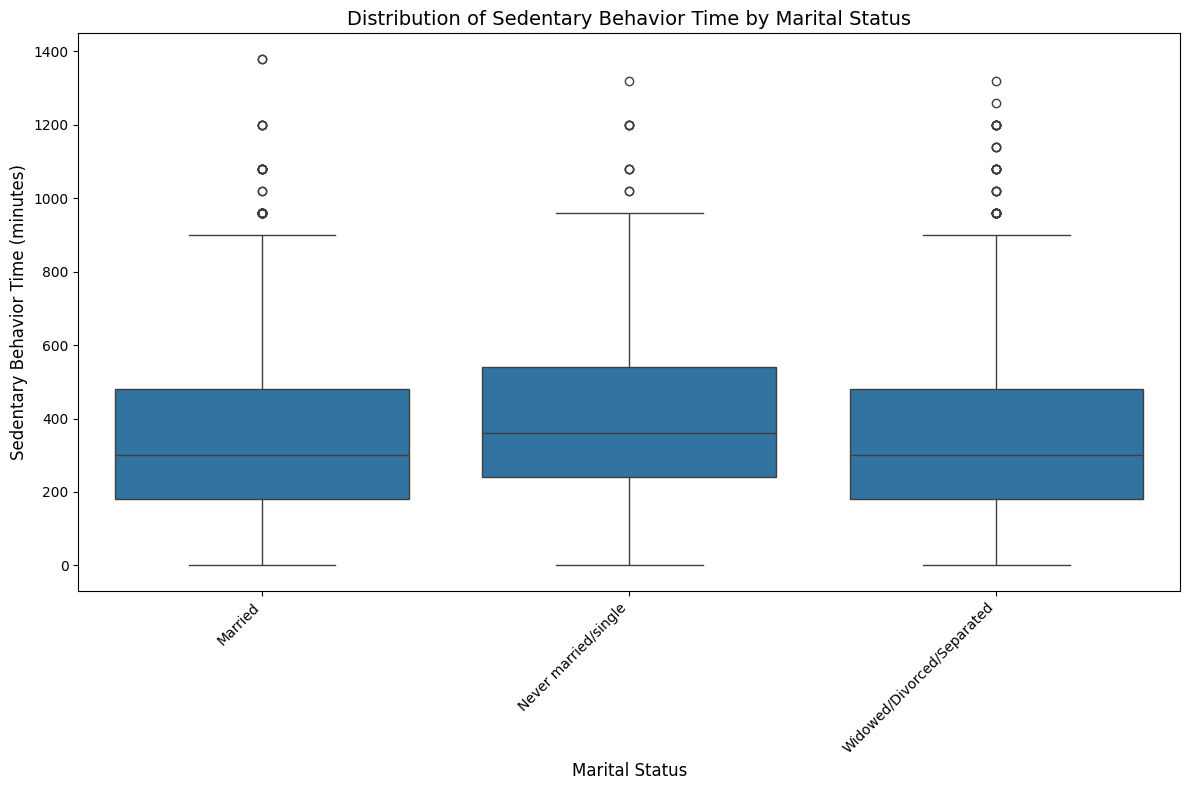

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove values 7777 and 9999 from PAD680 before dropping NaNs (added this line)
merged_df = merged_df[~merged_df['PAD680'].isin([7777, 9999])]

# Map numerical marital status back to descriptive labels for better visualization
merged_df['Marital_Status_Label'] = merged_df['DMDMARTZ'].map({
    1.0: 'Married',
    2.0: 'Widowed/Divorced/Separated',
    3.0: 'Never married/single'
})

# Create a box plot
plt.figure(figsize=(12, 8)) # Increased figure size
sns.boxplot(x='Marital_Status_Label', y='PAD680', data=merged_df)
plt.title('Distribution of Sedentary Behavior Time by Marital Status', fontsize=14) # Added fontsize
plt.xlabel('Marital Status', fontsize=12) # Added fontsize
plt.ylabel('Sedentary Behavior Time (minutes)', fontsize=12) # Added fontsize
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [32]:
# Question 3:"How do age and marital status affect systolic blood pressure?"

# Using 2-way ANOVA for analysis


import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
# Formula: Mean_Systolic_BP is the dependent variable
# Age_Group and DMDMARTZ are the independent variables
# C() indicates that Age_Group and DMDMARTZ are categorical variables
# Age_Group:DMDMARTZ includes the interaction term
model = ols('Mean_Systolic_BP ~ C(Age_Group) + C(DMDMARTZ) + C(Age_Group):C(DMDMARTZ)', data=merged_anova_df).fit()

# Perform the ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                                sum_sq      df             F    PR(>F)
C(Age_Group)              8.296928e+07     4.0  7.706503e+04  0.000000
C(DMDMARTZ)               1.333498e-09     2.0  2.477208e-12  1.000000
C(Age_Group):C(DMDMARTZ)  3.344155e+03     8.0  1.553089e+00  0.133525
Residual                  1.487611e+06  5527.0           NaN       NaN


/tmp/ipython-input-2928489035.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bp_by_group = merged_anova_df.groupby(['Age_Group', 'DMDMARTZ'])['Mean_Systolic_BP'].mean().unstack()


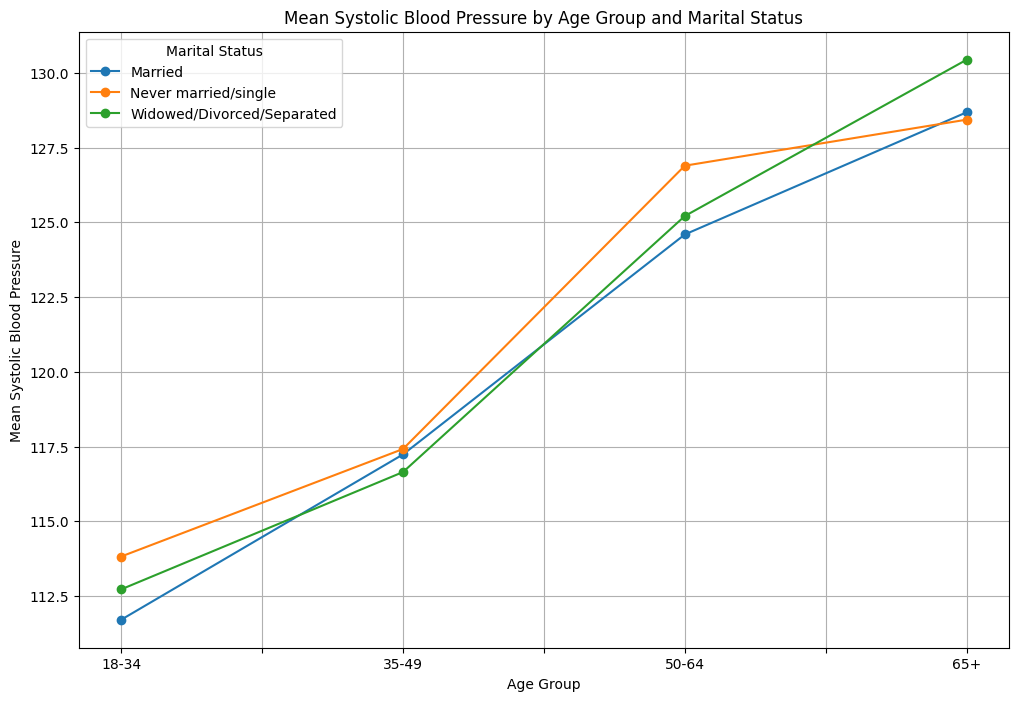

In [30]:
 # Visualize Results

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean systolic blood pressure for each age group and marital status combination
mean_bp_by_group = merged_anova_df.groupby(['Age_Group', 'DMDMARTZ'])['Mean_Systolic_BP'].mean().unstack()

# Create an interaction plot
plt.figure(figsize=(12, 8))
mean_bp_by_group.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Mean Systolic Blood Pressure by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Mean Systolic Blood Pressure')
plt.legend(title='Marital Status')
plt.grid(True)
plt.show()

In [ ]:
# Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?"


Pearson correlation coefficient between self-reported weight and sedentary behavior: 0.1560


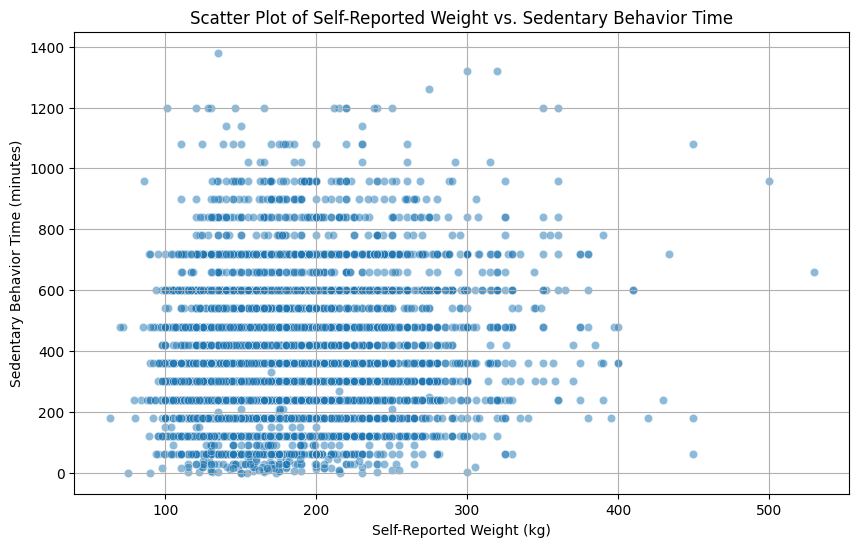

In [34]:
# Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?"

# Merge the weight and minbehavior dataframes on 'SEQN'
merged_correlation_df = pd.merge(weight[['SEQN', 'WHD020']], minbehavior[['SEQN', 'PAD680']], on='SEQN', how='inner')

# Clean the data: Remove specified values and NaNs from both columns
merged_correlation_df = merged_correlation_df[~merged_correlation_df['WHD020'].isin([7777, 9999])]
merged_correlation_df = merged_correlation_df[~merged_correlation_df['PAD680'].isin([7777, 9999])]
merged_correlation_df = merged_correlation_df.dropna(subset=['WHD020', 'PAD680'])

# Calculate the Pearson correlation coefficient
correlation = merged_correlation_df['WHD020'].corr(merged_correlation_df['PAD680'], method='pearson')

print(f"Pearson correlation coefficient between self-reported weight and sedentary behavior: {correlation:.4f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WHD020', y='PAD680', data=merged_correlation_df, alpha=0.5)
plt.title('Scatter Plot of Self-Reported Weight vs. Sedentary Behavior Time')
plt.xlabel('Self-Reported Weight (kg)') # Assuming WHD020 is in kg
plt.ylabel('Sedentary Behavior Time (minutes)') # Assuming PAD680 is in minutes
plt.grid(True)
plt.show()

*   The Pearson correlation coefficient between self-reported weight and sedentary behavior was calculated to be approximately 0.1560.
*   This indicates a weak positive linear correlation between self-reported weight and sedentary behavior.
*   The scatter plot visualized this relationship, showing a slight upward trend, but with considerable scatter, consistent with a weak correlation.

In [ ]:
# Quesion 5: Is there an association between age and sedentary behavior?


                            OLS Regression Results                            
Dep. Variable:                 PAD680   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.213
Date:                Fri, 17 Oct 2025   Prob (F-statistic):             0.0731
Time:                        00:45:49   Log-Likelihood:                -54567.
No. Observations:                8065   AIC:                         1.091e+05
Df Residuals:                    8063   BIC:                         1.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        373.9513      6.973     53.632      0.0

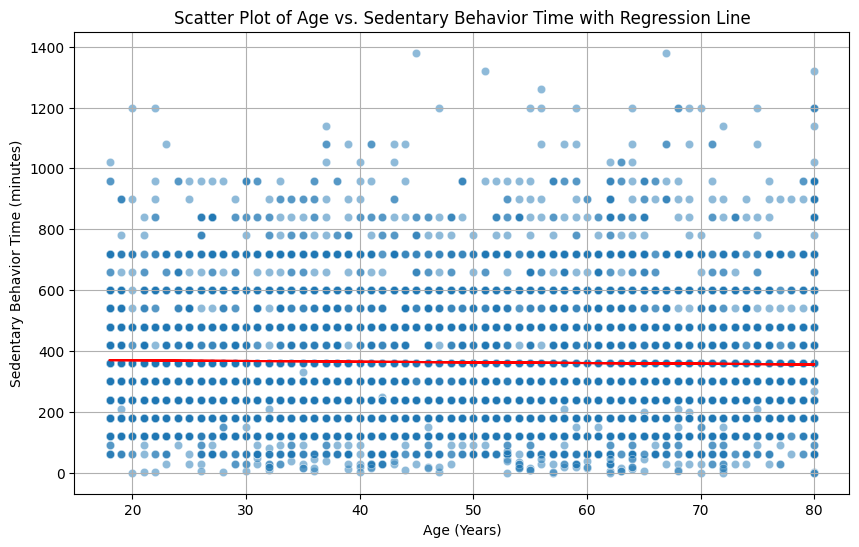

In [38]:
# Question 5: Is there an association between age and sedentary behavior?

# Merge the demo and minbehavior dataframes on 'SEQN'
merged_age_sb = pd.merge(demo[['SEQN', 'RIDAGEYR']], minbehavior[['SEQN', 'PAD680']], on='SEQN', how='inner')

# Clean the data: Remove specified values and NaNs from relevant columns
merged_age_sb = merged_age_sb[~merged_age_sb['PAD680'].isin([7777, 9999])]
merged_age_sb = merged_age_sb.dropna(subset=['RIDAGEYR', 'PAD680'])

# Perform linear regression
import statsmodels.api as sm

X = merged_age_sb['RIDAGEYR']
y = merged_age_sb['PAD680']

# Add a constant to the independent variable
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RIDAGEYR', y='PAD680', data=merged_age_sb, alpha=0.5)
plt.plot(merged_age_sb['RIDAGEYR'], model.predict(X), color='red') # Add regression line
plt.title('Scatter Plot of Age vs. Sedentary Behavior Time with Regression Line')
plt.xlabel('Age (Years)')
plt.ylabel('Sedentary Behavior Time (minutes)')
plt.grid(True)
plt.show()